In [29]:
import numpy as np
import matplotlib.pyplot as plt
from prysm._richdata import Slices

In [33]:
h, v, p, m = 0., 0., 0., 0.
GSMT = 'GMT'
for i in range(1):
    h += np.load(f'wfs/{GSMT}_100ms_exposure_0{i}_h_Rband.npy').reshape([720, 720])
    v += np.load(f'wfs/{GSMT}_100ms_exposure_0{i}_v_Rband.npy').reshape([720, 720])
    p += np.load(f'wfs/{GSMT}_100ms_exposure_0{i}_p_Rband.npy').reshape([720, 720])
    m += np.load(f'wfs/{GSMT}_100ms_exposure_0{i}_m_Rband.npy').reshape([720, 720])

h /= 1 * 100
v /= 1 * 100
p /= 1 * 100
m /= 1 * 100

q = h - v
Qim = q / (h + v)
u = p - m
Uim = u / (p + m)

In [34]:
x = np.linspace(-30,30,h.shape[0])
y = np.copy(x)

I = Slices(h.reshape([720,720]) + v.reshape([720,720]), x, y)
std_in = I.azstd

Q = Slices(h.reshape([720,720]) - v.reshape([720,720]), x, y)
std_qn = Q.azstd

U = Slices(p.reshape([720,720]) - m.reshape([720,720]), x, y)
std_un = U.azstd

# Plot the Single Difference Q image

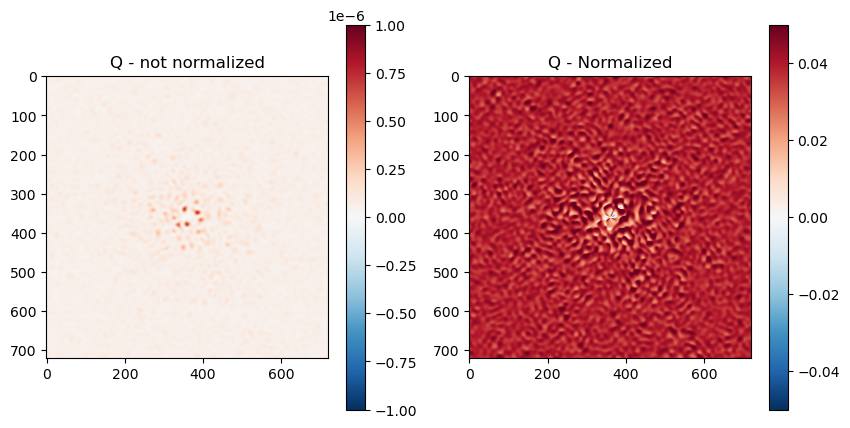

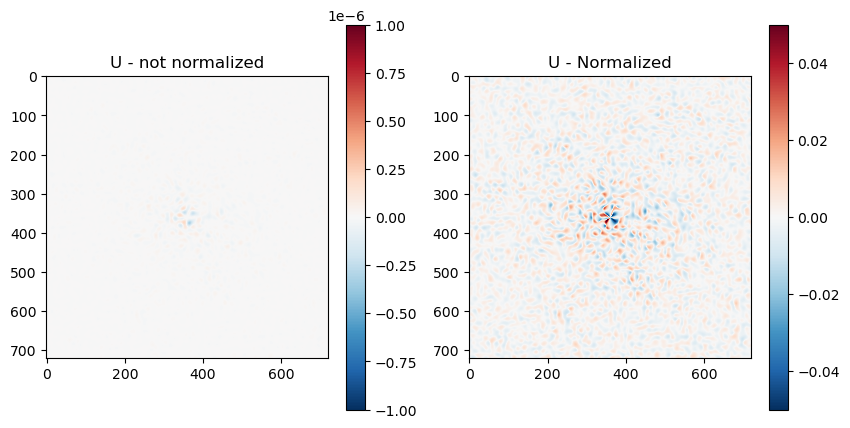

In [35]:
vlim = 1e-6
vlimn = 5e-2
cmap = 'RdBu_r'
plt.style.use('default')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.title('Q - not normalized')
plt.imshow(q, vmax=vlim, vmin=-vlim, cmap=cmap)
plt.colorbar()
plt.subplot(122)
plt.title('Q - Normalized')
plt.imshow(Qim, vmax=vlimn, vmin=-vlimn, cmap=cmap)
plt.colorbar()
plt.show()

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.title('U - not normalized')
plt.imshow(u, vmax=vlim, vmin=-vlim, cmap=cmap)
plt.colorbar()
plt.subplot(122)
plt.title('U - Normalized')
plt.imshow(Uim, vmax=vlimn, vmin=-vlimn, cmap=cmap)
plt.colorbar()
plt.show()

In [36]:
x = np.linspace(-30, 30, q.shape[0])
x, y = np.meshgrid(x, x)
r = np.sqrt(x**2 + y**2)
mask = np.zeros_like(x)
mask[r < 5] = 1
mask[r < 3] = 0

# unnorm_mean_h = np.mean(h[mask==1])
# unnorm_mean_v = np.mean(v[mask==1])
# unnorm_mean_p = np.mean(p[mask==1])
# unnorm_mean_m = np.mean(m[mask==1])


# h *= 1 / unnorm_mean_h
# v *= unnorm_mean_h / unnorm_mean_v
# p *= 1 / unnorm_mean_p
# m *= unnorm_mean_p / unnorm_mean_m

# q = h - v
# Q = q / (h + v)
# u = p - m
# U = u / (p + m)

unnorm_mean_q = np.mean(q[mask==1])
norm_mean_q = np.mean(Qim[mask==1])
print('Un-normalized Mean')
print(unnorm_mean_q)
print('Normalized Mean')
print(norm_mean_q)

unnorm_mean_u = np.mean(u[mask==1])
norm_mean_u = np.mean(Uim[mask==1])
print('Un-normalized Mean')
print(unnorm_mean_u)
print('Normalized Mean')
print(norm_mean_u)

Un-normalized Mean
1.1824739062086595e-07
Normalized Mean
0.03840612650776628
Un-normalized Mean
8.379758130400858e-10
Normalized Mean
0.0009633734573232891


In [37]:
if norm_mean_q >= 0:
    h *= (1-norm_mean_q)
else:
    v *= (1+norm_mean_q)

if norm_mean_u >= 0:
    p *= (1-norm_mean_u)
    
else:
    m *= (1+norm_mean_u)

Positive mean values suggest that H is greater, while negative values suggest that V is greater

In [38]:
q = h - v
Q = q / (h + v)
u = p - m
U = u / (p + m)

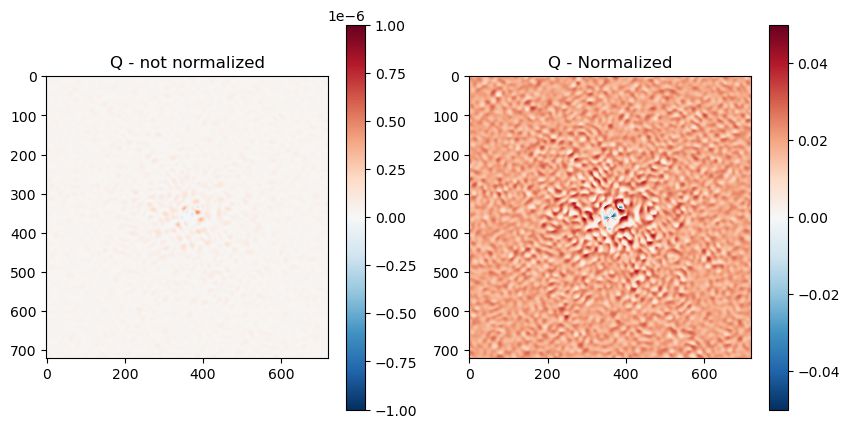

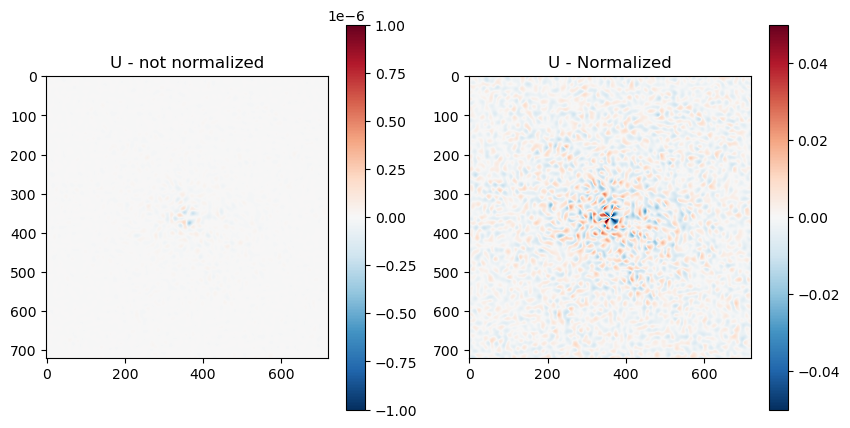

Un-normalized Mean
5.6884527922372896e-08
Normalized Mean
0.018843953815147575
Un-normalized Mean
-6.446863791347846e-10
Normalized Mean
0.0004814943879348874


In [39]:
vlim = 1e-6
vlimn = 5e-2
cmap = 'RdBu_r'
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.title('Q - not normalized')
plt.imshow(q, vmax=vlim, vmin=-vlim, cmap=cmap)
plt.colorbar()
plt.subplot(122)
plt.title('Q - Normalized')
plt.imshow(Q , vmax=vlimn, vmin=-vlimn, cmap=cmap)
plt.colorbar()
plt.show()

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.title('U - not normalized')
plt.imshow(u, vmax=vlim, vmin=-vlim, cmap=cmap)
plt.colorbar()
plt.subplot(122)
plt.title('U - Normalized')
plt.imshow(U, vmax=vlimn, vmin=-vlimn, cmap=cmap)
plt.colorbar()
plt.show()

unnorm_mean = np.mean(q[mask==1])
norm_mean = np.mean(Q[mask==1])
print('Un-normalized Mean')
print(unnorm_mean)
print('Normalized Mean')
print(norm_mean)


unnorm_mean_u = np.mean(u[mask==1])
norm_mean_u = np.mean(U[mask==1])
print('Un-normalized Mean')
print(unnorm_mean_u)
print('Normalized Mean')
print(norm_mean_u)

In [40]:
x = np.linspace(-30,30,h.shape[0])
y = np.copy(x)

I = Slices(h.reshape([720,720]) + v.reshape([720,720]), x, y)
std_i = I.azstd

Q = Slices(h.reshape([720,720]) - v.reshape([720,720]), x, y)
std_q = Q.azstd

U = Slices(p.reshape([720,720]) - m.reshape([720,720]), x, y)
std_u = U.azstd

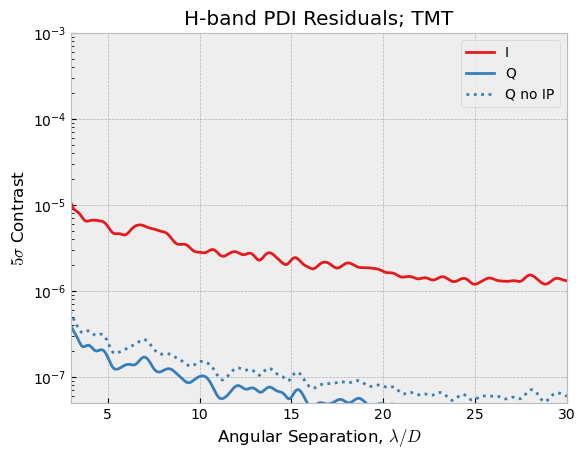

In [41]:
plt.style.use('bmh')
n = 9
color = plt.cm.Set1(np.linspace(0,1,n))
xpro = std_u[0]#np.linspace(0,30,len(std_i_01s))

plt.title('H-band PDI Residuals; TMT')
plt.plot(xpro,std_i[1] * 5, label='I', color=color[0], linestyle='solid')
plt.plot(xpro,std_q[1] * 5, label='Q', color=color[1], linestyle='solid')
# plt.plot(xpro,std_u[1] * 5, label='U', color=color[2], linestyle='solid')
# plt.plot(xpro,std_in[1] * 5, label='I', color=color[0], linestyle='dotted')
plt.plot(xpro,std_qn[1] * 5, label='Q no IP', color=color[1], linestyle='dotted')
# plt.plot(xpro,std_un[1] * 5, label='U', color=color[2], linestyle='dotted')
# plt.plot(xpro,np.zeros_like(std_i[1]), color='k', linestyle='dotted', label='Before IP')
# plt.plot(xpro,np.zeros_like(std_i[1]), color='k', linestyle='solid', label=r'After IP')
plt.yscale('log')
plt.ylim(5e-8,1e-3)
plt.xlim(3,30)
plt.ylabel(r'$5\sigma$'+' Contrast')
plt.xlabel('Angular Separation, '+r'$\lambda / D$')
plt.legend()

In [58]:
# np.save('gsmt_pros/gmt_1s_I.npy', std_i[1])
# np.save('gsmt_pros/gmt_1s_Q.npy', std_q[1])
# np.save('gsmt_pros/gmt_1s_U.npy', std_u[1])

In [43]:
tmt_I = np.load('gsmt_pros/tmt_1s_I.npy')
tmt_Q = np.load('gsmt_pros/tmt_1s_Q.npy') 
tmt_U = np.load('gsmt_pros/tmt_1s_U.npy')

elt_I = np.load('gsmt_pros/elt_1s_I.npy')
elt_Q = np.load('gsmt_pros/elt_1s_Q.npy') 
elt_U = np.load('gsmt_pros/elt_1s_U.npy')

gmt_I = np.load('gsmt_pros/gmt_1s_I.npy')
gmt_Q = np.load('gsmt_pros/gmt_1s_Q.npy')
gmt_U = np.load('gsmt_pros/gmt_1s_U.npy')

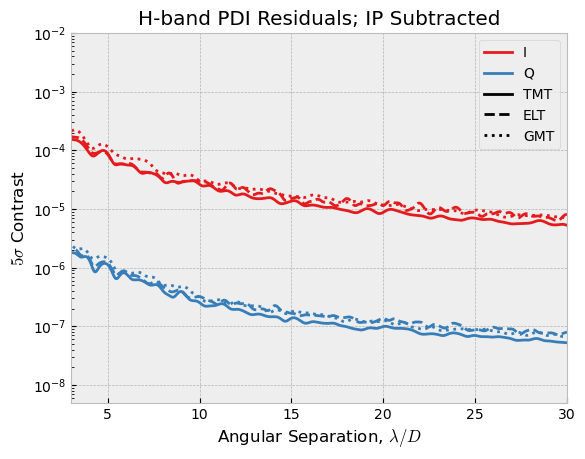

In [46]:
plt.style.use('bmh')
plt.title('H-band PDI Residuals; IP Subtracted')
plt.plot(xpro,tmt_I * 5, color=color[0], linestyle='solid')
plt.plot(xpro,tmt_Q * 5, color=color[1], linestyle='solid')

plt.plot(xpro,elt_I * 5, color=color[0], linestyle='dashed')
plt.plot(xpro,elt_Q * 5, color=color[1], linestyle='dashed')

plt.plot(xpro,gmt_I * 5, color=color[0], linestyle='dotted')
plt.plot(xpro,gmt_Q * 5, color=color[1], linestyle='dotted')
# plt.plot(xpro, power_law(xpro, 1e-5, 2), color='black')

plt.plot(xpro,np.zeros_like(std_i[1]), color=color[0], linestyle='solid', label='I')
plt.plot(xpro,np.zeros_like(std_i[1]), color=color[1], linestyle='solid', label='Q')
plt.plot(xpro,np.zeros_like(std_i[1]), color='k', linestyle='solid', label='TMT')
plt.plot(xpro,np.zeros_like(std_i[1]), color='k', linestyle='dashed', label='ELT')
plt.plot(xpro,np.zeros_like(std_i[1]), color='k', linestyle='dotted', label='GMT')
# plt.plot(xpro,np.zeros_like(std_i[1]), color='k', linestyle='dotted', label='U')
plt.yscale('log')
plt.ylim(5e-9,1e-2)
plt.xlim(3,30)
plt.ylabel(r'$5\sigma$'+' Contrast')
plt.xlabel('Angular Separation, '+r'$\lambda / D$')
plt.legend()

In [389]:
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return b * (x/a) ** (-1)

def logarithmic_decay(x, a, b, c):
    return -a*np.log(b*x) + c

def exponential(x, k, c):
    return np.exp(k*x) + c

In [390]:
results = curve_fit(power_law, xpro[1:], gmt_Q[1:], p0=(1e-5, 1))

In [391]:
results

(array([-6.55920825e-06, -7.53256791e-04]),
 array([[ 2.61342152e+04, -2.97125398e+06],
        [-2.97125398e+06,  3.37808125e+08]]))

In [392]:
plt.plot(power_law(xpro, 1, 3, 1e-5))
plt.yscale('log')

TypeError: power_law() takes 3 positional arguments but 4 were given